# **Individual Assignment 2: Employee Personality Test Prediction**

![Imgur](https://i.imgur.com/4HJknC2.png)

# **Scenario**
Personality tests are used by many companies during the hiring process. They are designed to help employers gain more insight into each candidate's work style and preferences. Company A is analyzing the data they got from their candidates through personality test in order to find the best fit for their company. The original dataset includes different sections, for this individual homework we will only focus on the mental state assessment section. The company has provided you this data from more than 5000 employees with 90 questions.
 
**Dataset description: Check the Dataset Description PDF file** 

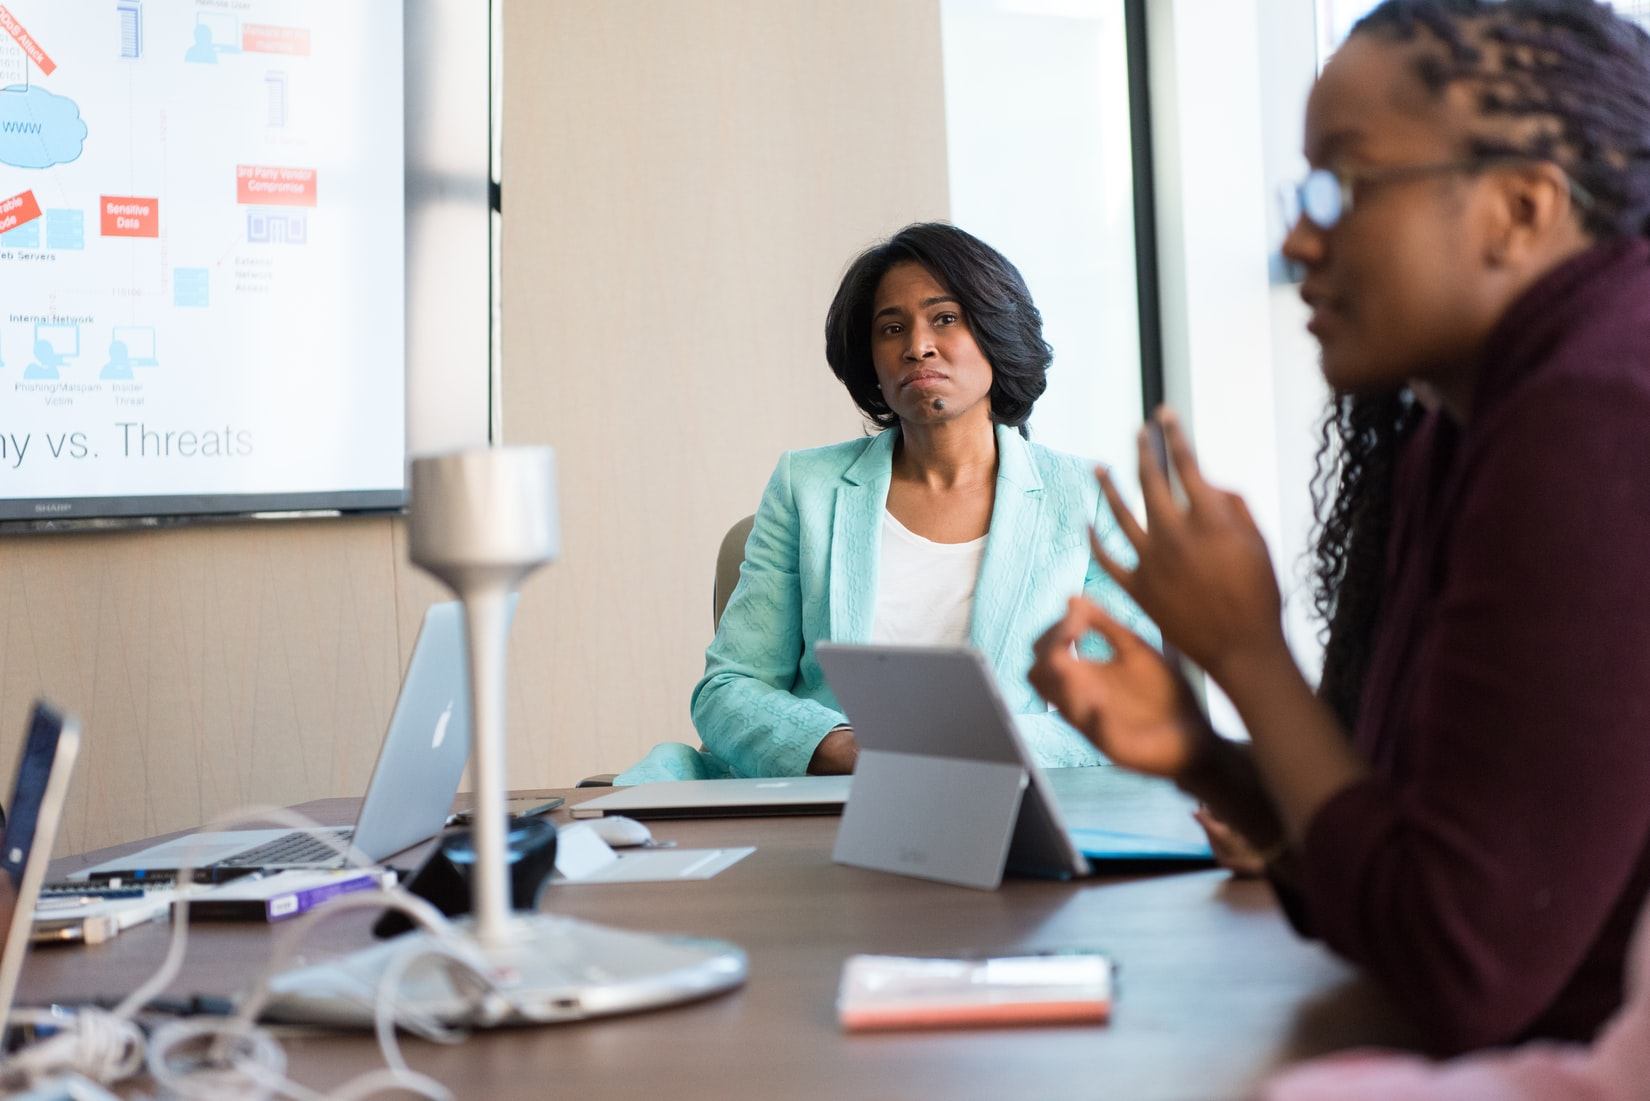



> Photo by Christina @ wocintechchat.com available at Unsplash.



# **Task**
In this assignment, you are expected to build a neural network to **classify** participants into 3 different groups (i.e. 3 mental states).

**Prepare Data**

In [1]:
# Mount with Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
# CSV file cleaned for you
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/deep learning/Individual Assignment 2/mental-disorders-dataset.xlsx',index_col=0)

In [3]:
df.head()

,Doctor_Id,Age,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,...,C_82,C_83,C_84,C_85,C_86,C_87,C_88,C_89,C_90,Class
Id,,,,,,,,,,,,,,,,,,,,,
O_2,137,32,4,4,3,1,3,3,2,2,...,3,2,1,1,2,2,2,2,1,2
O_3,140,27,3,5,5,2,1,5,1,5,...,1,4,1,1,3,2,1,5,2,1
O_4,140,28,3,2,3,1,4,1,1,2,...,1,1,1,4,1,1,1,4,1,2
O_5,141,20,2,5,5,2,5,3,1,4,...,1,5,5,4,5,2,3,3,5,1
O_6,141,16,1,1,2,1,1,1,3,3,...,1,2,1,3,1,1,3,2,1,0


In [4]:
df.shape

(5710, 93)

**Descriptive Analysis**

<Axes: >

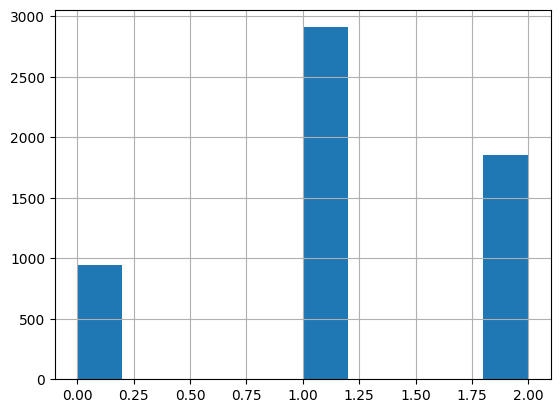

In [5]:
df.Class.hist()

**Train Test Split**

In [8]:
from sklearn.model_selection import train_test_split
 
# Train-test-validation split
train,_=train_test_split(df,test_size=0.1,stratify=df["Class"])
validation,test=train_test_split(_,test_size=0.5)
print(train.shape,validation.shape,test.shape)

(5139, 93) (285, 93) (286, 93)


### Build A Neural Network Without Regularization

In [20]:
import keras
from keras import models
from keras import layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(df.shape[1]-1,)))
#Three more hidden layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 
# optimizer='adam';
model_hist=model.fit(train.drop("Class",axis=1),train["Class"],
                     epochs=20,
                     batch_size=64,
                     validation_data=(validation.drop("Class",axis=1), validation["Class"]))

Epoch 1/20
81/81 [==============================] - 3s 6ms/step - loss: 3.2238 - accuracy: 0.4703 - val_loss: 0.8587 - val_accuracy: 0.5930
Epoch 2/20
81/81 [==============================] - 0s 4ms/step - loss: 1.2975 - accuracy: 0.5542 - val_loss: 1.3534 - val_accuracy: 0.5544
Epoch 3/20
81/81 [==============================] - 0s 3ms/step - loss: 1.1387 - accuracy: 0.6034 - val_loss: 0.6418 - val_accuracy: 0.7018
Epoch 4/20
81/81 [==============================] - 0s 4ms/step - loss: 0.8901 - accuracy: 0.6692 - val_loss: 0.9314 - val_accuracy: 0.6807
Epoch 5/20
81/81 [==============================] - 0s 5ms/step - loss: 0.9362 - accuracy: 0.6766 - val_loss: 0.7407 - val_accuracy: 0.7193
Epoch 6/20
81/81 [==============================] - 0s 4ms/step - loss: 1.1306 - accuracy: 0.6583 - val_loss: 0.8944 - val_accuracy: 0.6491
Epoch 7/20
81/81 [==============================] - 0s 4ms/step - loss: 0.8689 - accuracy: 0.6925 - val_loss: 0.6146 - val_accuracy: 0.7509
Epoch 8/20
81/81 [==

In [21]:
#Model Evaluation

def evaluatemodel(model,model_hist,X_validate,y_validate,X_test,y_test):
    print('Training loss:', model_hist.history['loss'][-1])
    print('Training accuracy:', model_hist.history['accuracy'][-1], '\n')
    score = model.evaluate(X_validate, y_validate, verbose=1)
    print('Validate loss:', score[0])
    print('Validate accuracy:', score[1])
    print()
    score = model.evaluate(X_test, y_test, verbose=1)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

evaluatemodel(model,model_hist,validation.drop("Class",axis=1), validation["Class"],test.drop("Class",axis=1), test["Class"])

Training loss: 0.4061194360256195
Training accuracy: 0.8355711102485657 

9/9 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.8456
Validate loss: 0.3796004056930542
Validate accuracy: 0.8456140160560608

9/9 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8322
Test loss: 0.4094816744327545
Test accuracy: 0.8321678042411804


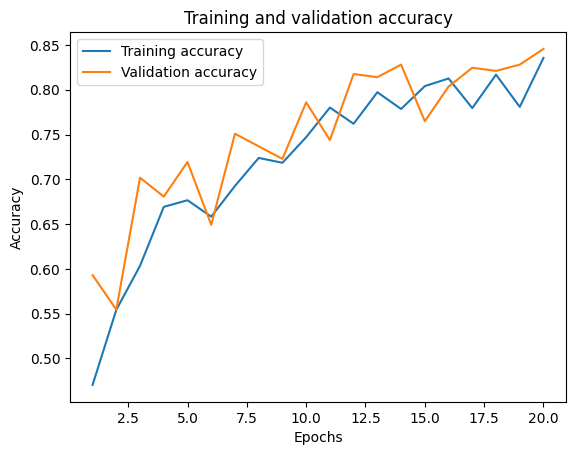

In [22]:
import matplotlib.pyplot as plt

def plotresults(model_hist):
    acc = model_hist.history['accuracy']
    val_acc = model_hist.history['val_accuracy']
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo" is for "blue dot"
    plt.plot(epochs, acc, label='Training accuracy')
    # b is for "solid blue line"
    plt.plot(epochs, val_acc, label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
  
plotresults(model_hist)

### Q1. How does the model performs? Please intepret the plot you generated and identify the possible issue with current model. Please also provide possible resolutions.

grading: 

*   talk about training and validation accuracy
*   whether training accuracy is worse than validation accuracy, if so identify overfit
*   dropout layer, regularization (tips: Basically, you can dropout and regularization in every layer. But you dont have to do so. You can add them in any layer you want)





##<font color = blue>Answer: <br> <font color = blue>From the plot above we can find that the validation accuracy and training accuracy is about 0.84, so the model does not have serious underfitting or overfiotting problem. However, we can also improve it.

#### Use Dropout Regularization


In [28]:
from keras.layers import Dropout

# Define the model
dropout_model = models.Sequential()
dropout_model.add(layers.Dense(256, activation='relu', input_shape=(df.shape[1]-1,)))
dropout_model.add(layers.Dropout(0.5))
# Three more hidden layers with dropouts
dropout_model.add(layers.Dense(64, activation='relu'))
dropout_model.add(layers.Dense(64, activation='relu'))
dropout_model.add(layers.Dense(64, activation='relu'))
dropout_model.add(layers.Dense(3, activation='softmax'))  

# Compile the model
dropout_model.compile(optimizer='adam', 
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy']) 

dropout_model_hist=dropout_model.fit(train.drop("Class",axis=1),train["Class"],
                     epochs=20,
                     batch_size=64,
                     validation_data=(validation.drop("Class",axis=1), validation["Class"]))

Epoch 1/20
81/81 [==============================] - 2s 7ms/step - loss: 6.2862 - accuracy: 0.4049 - val_loss: 1.4487 - val_accuracy: 0.5439
Epoch 2/20
81/81 [==============================] - 0s 4ms/step - loss: 2.5521 - accuracy: 0.4242 - val_loss: 1.3401 - val_accuracy: 0.3333
Epoch 3/20
81/81 [==============================] - 0s 5ms/step - loss: 1.7716 - accuracy: 0.4499 - val_loss: 1.0570 - val_accuracy: 0.5158
Epoch 4/20
81/81 [==============================] - 0s 5ms/step - loss: 1.4712 - accuracy: 0.4581 - val_loss: 1.1993 - val_accuracy: 0.5158
Epoch 5/20
81/81 [==============================] - 0s 5ms/step - loss: 1.3258 - accuracy: 0.4764 - val_loss: 0.9481 - val_accuracy: 0.5158
Epoch 6/20
81/81 [==============================] - 0s 5ms/step - loss: 1.2179 - accuracy: 0.4787 - val_loss: 0.9497 - val_accuracy: 0.5158
Epoch 7/20
81/81 [==============================] - 0s 5ms/step - loss: 1.0888 - accuracy: 0.5015 - val_loss: 0.9186 - val_accuracy: 0.5404
Epoch 8/20
81/81 [==

In [29]:
# Evaluate Model with Dropout Added
evaluatemodel(dropout_model, dropout_model_hist, validation.drop("Class",axis=1), validation["Class"],test.drop("Class",axis=1), test["Class"])

Training loss: 0.6349106431007385
Training accuracy: 0.7151196599006653 

9/9 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7579
Validate loss: 0.5291270613670349
Validate accuracy: 0.75789475440979

9/9 [==============================] - 0s 4ms/step - loss: 0.5429 - accuracy: 0.7762
Test loss: 0.5428687930107117
Test accuracy: 0.7762237787246704


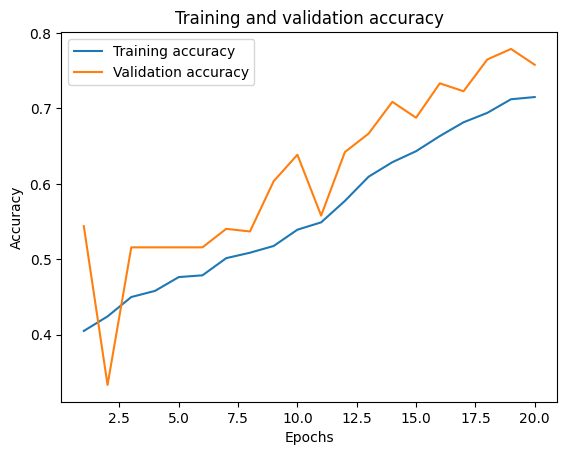

In [30]:
# Plot the Result of the Model with Dropout Added
plotresults(dropout_model_hist)

### Q2. Please descibe how did you improve from the last model? Does your new model solve the issue? If so, why does your improvement works? If not, is there other resolutions?

grading:

*   talk about how dropout layer is added
*   whether training accuracy is still worse than validation accuracy
*   regularization

## <font color = blue>Answer: <br><font color = blue> From the result above we can find that the accuracy does not improve, instead goes down a little. So we can add some neurons, add hiddenlayers and use larger epochs.

#### Use L2 Weight Regularization

In [52]:
from keras.regularizers import l2

l2_model = models.Sequential()
l2_model.add(layers.Dense(256, activation='relu',kernel_regularizer='l2',input_shape=(df.shape[1]-1,)))
# Three more hidden layers with regularzier
l2_model.add(layers.Dense(256, activation='relu'))
l2_model.add(layers.Dense(256, activation='relu'))
l2_model.add(layers.Dense(256, activation='relu'))
l2_model.add(layers.Dense(128, activation='relu'))
l2_model.add(layers.Dense(3, activation='softmax'))

l2_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

l2_model_hist = l2_model.fit(train.drop("Class",axis=1),train["Class"],
                     epochs=40,
                     batch_size=128,
                     validation_data=(validation.drop("Class",axis=1), validation["Class"]))

Epoch 1/40
41/41 [==============================] - 2s 17ms/step - loss: 5.2826 - accuracy: 0.4291 - val_loss: 1.2816 - val_accuracy: 0.4596
Epoch 2/40
41/41 [==============================] - 0s 12ms/step - loss: 1.4529 - accuracy: 0.5087 - val_loss: 2.3926 - val_accuracy: 0.5088
Epoch 3/40
41/41 [==============================] - 1s 14ms/step - loss: 1.1618 - accuracy: 0.5554 - val_loss: 0.9780 - val_accuracy: 0.5719
Epoch 4/40
41/41 [==============================] - 1s 20ms/step - loss: 0.8541 - accuracy: 0.6235 - val_loss: 0.7481 - val_accuracy: 0.6351
Epoch 5/40
41/41 [==============================] - 1s 22ms/step - loss: 0.7965 - accuracy: 0.6692 - val_loss: 0.9137 - val_accuracy: 0.6632
Epoch 6/40
41/41 [==============================] - 1s 20ms/step - loss: 0.7426 - accuracy: 0.6982 - val_loss: 0.5976 - val_accuracy: 0.7404
Epoch 7/40
41/41 [==============================] - 1s 21ms/step - loss: 0.6575 - accuracy: 0.7212 - val_loss: 0.5066 - val_accuracy: 0.8070
Epoch 8/40
41

#### Use L2 Weight Regularization

In [53]:
# Evaluate Model with l2 Added
evaluatemodel(l2_model, l2_model_hist, validation.drop("Class",axis=1), validation["Class"],test.drop("Class",axis=1), test["Class"])

Training loss: 0.23429922759532928
Training accuracy: 0.9034831523895264 

9/9 [==============================] - 0s 3ms/step - loss: 0.2786 - accuracy: 0.8807
Validate loss: 0.2785525619983673
Validate accuracy: 0.8807017803192139

9/9 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.8916
Test loss: 0.30320167541503906
Test accuracy: 0.8916084170341492


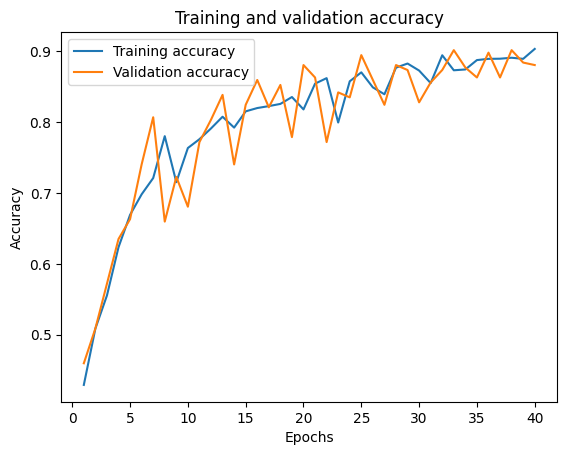

In [54]:
# Plot the Result of the Model with l2 Added
plotresults(l2_model_hist)

### Q3. Please describe the intuitive idea of regularization and how it helps to improve the model? Does regularization helps the performance of your model?



*   intepret the training and validation error


## <font color = blue>Answer: <br>We can find that the newest model reaches a training accuracy of 0.91 and testing accuracy of 0.8916, which is accurate enough. Also from the plot we can see that there is no serious overfitting problem in this model.